## Final Project Submission

Please fill out:
* Student name: Naomi Chesang Rotich
* Student pace: part time
* Scheduled project review date/time: 06/02/2023
* Instructor name: Roselynn Kamau
* Blog post URL:https://medium.com/@naomi.rotich/uncovering-the-secrets-of-box-office-success-a-deep-dive-into-the-film-industry-with-microsoft-f3fd73434569


# Introduction.
## Problem statement.
Microsoft, recognizing the proliferation of original video content production among leading corporations, has decided to establish their own movie studio. However, lacking the internal expertise to effectively navigate the intricacies of film production, they require a comprehensive examination of the current state of the box office landscape. As a result, you have been tasked with conducting an in-depth analysis of the motion picture market to discern the prevailing trends and patterns in the industry. 
## Main objective
To determine the most profitable film genres in the current market in order to inform the company's decision-making process for creating a new movie studio.
## Specific objectives
Identify the most frequent genres in the dataset. 

Investigate the most rated and voted genres.

Identify general trends of revenue generation over years.

Discover top competitors in the market.
### Loading data.
Import data from localhosts notebooks.

In [1]:
#libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing data
basics_df = pd.read_csv("title.basics.csv", index_col = 0)
basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
gross_df = pd.read_csv('bom.movie_gross.csv')
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
ratings_df = pd.read_csv('title.ratings.csv')
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
# Join the title.ratings.csv and title.basics.csv datasets on the "tconst" column
ratings_basics_df = pd.merge(ratings_df, basics_df, on='tconst')
ratings_basics_df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [6]:
# Join the resulting dataset with the bom.movie_gross.csv dataset on the "title" column
df = pd.merge(ratings_basics_df, gross_df, left_on='primary_title', right_on='title')
df.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Baggage Claim,FoxS,21600000.0,887000,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Moneyball,Sony,75600000.0,34600000,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",Hereafter,WB,32700000.0,72500000,2010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   averagerating    3027 non-null   float64
 2   numvotes         3027 non-null   int64  
 3   primary_title    3027 non-null   object 
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   title            3027 non-null   object 
 9   studio           3024 non-null   object 
 10  domestic_gross   3005 non-null   float64
 11  foreign_gross    1832 non-null   object 
 12  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 331.1+ KB


# Preprocess of data
This includes cleaning, scrubbing, handling missing values. 
## Duplicated columns
From the resulting table, we have three columns containing title names and year, having all of them would not be of help, hence dropping original_title and title is a good idea.


In [8]:
# dropping the original_title and title columns
df.drop(columns = ['original_title', 'title','year','tconst'], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    3027 non-null   float64
 1   numvotes         3027 non-null   int64  
 2   primary_title    3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   studio           3024 non-null   object 
 7   domestic_gross   3005 non-null   float64
 8   foreign_gross    1832 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 236.5+ KB


## Missing values
For the null values, we can either drop them or impute them with mean, median, or using special identifiers. This depends with on the nature of data.

In [10]:
# checking for missing values
df.isna().sum()

averagerating         0
numvotes              0
primary_title         0
start_year            0
runtime_minutes      47
genres                7
studio                3
domestic_gross       22
foreign_gross      1195
dtype: int64

In [11]:
def missing_values(data):
     # identify the total missing values per column
    miss = data.isnull().sum().sort_values(ascending = False)
     # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)
    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data


,Missing Values,Percentage(%)
foreign_gross,1195,0.394780
runtime_minutes,47,0.015527
domestic_gross,22,0.007268
genres,7,0.002313
studio,3,0.000991


From the output, variable genre, studio, and runtime in minutes has negligible missing values and dropping them would not affect the performance of our model. Filling the missing values will not be the best option since each movie has a inique title and runtimes. For the domestic and foreign gross columns, they are dependant on the type of studio, such that movies on a prticular studio has high gross revenue generated both domestically and outside compared to the others. For this reason, dropping the missing values will be rightful to avoid over estimate or under estimate the revenue generated by certain studios which might bring bias in our analysis. 


In [12]:
#dropping rows with null values
df.dropna(axis=0, inplace=True)

In [13]:
df.isna().sum()

averagerating      0
numvotes           0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
studio             0
domestic_gross     0
foreign_gross      0
dtype: int64

In [14]:
# foreign_gross is of datatype object instead of float
# foreign_gross to float
df["foreign_gross"] = df["foreign_gross"].str.replace(',' ,'').astype(float)
df["foreign_gross"].head()

0     42400000.0
1       887000.0
3     34600000.0
4     72500000.0
5    485300000.0
Name: foreign_gross, dtype: float64

In [15]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0
1,5.1,8296,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0
3,7.6,326657,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0
4,6.5,87288,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0


In [16]:
df['genre']=df['genres'].str.split(",", expand= True)[0]
df['genre'][0]

'Action'

In [17]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,genre
0,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,Action
1,5.1,8296,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,Comedy
3,7.6,326657,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,Biography
4,6.5,87288,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,Drama
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0,Action


In [18]:
df.drop(columns = ['genres'], axis=1, inplace = True)

In [19]:
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,studio,domestic_gross,foreign_gross,genre
0,4.2,50352,The Legend of Hercules,2014,99.0,LG/S,18800000.0,42400000.0,Action
1,5.1,8296,Baggage Claim,2013,96.0,FoxS,21600000.0,887000.0,Comedy
3,7.6,326657,Moneyball,2011,133.0,Sony,75600000.0,34600000.0,Biography
4,6.5,87288,Hereafter,2010,129.0,WB,32700000.0,72500000.0,Drama
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,Par.,209400000.0,485300000.0,Action


In [20]:
#overal statistics the dataset
df.describe()

,averagerating,numvotes,start_year,runtime_minutes,domestic_gross,foreign_gross
count,1767.000000,1.767000e+03,1767.000000,1767.000000,1.767000e+03,1.767000e+03
mean,6.459706,9.692010e+04,2013.559706,107.895869,5.008103e+07,7.959582e+07
std,0.991033,1.539057e+05,2.621180,20.105904,8.101089e+07,1.403646e+08
min,1.600000,5.000000e+00,2010.000000,3.000000,4.000000e+02,6.000000e+02
25%,5.900000,6.392500e+03,2011.000000,95.000000,1.300000e+06,4.900000e+06
50%,6.500000,3.987000e+04,2013.000000,106.000000,2.110000e+07,2.150000e+07
75%,7.100000,1.171330e+05,2016.000000,119.000000,6.120000e+07,8.195000e+07
max,9.200000,1.841066e+06,2019.000000,272.000000,7.001000e+08,9.464000e+08


It is interesting that there is a difference between the mean and the median value of numvotes, domestic_gross and froreign_gross. Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there difference of one between them? to answer this question we need how the runtime in minites are distributed in our dataset. we'll look at it in two ways, by a histogram and a boxplot.


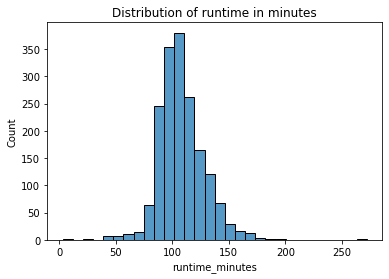

In [21]:
ax=sns.histplot(data=df, x="runtime_minutes", bins=30)
ax.set_title('Distribution of runtime in minutes');

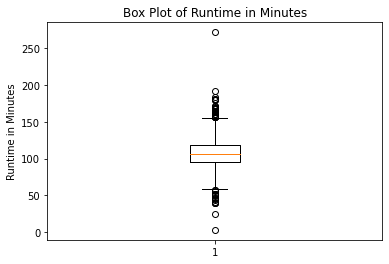

In [22]:
# Select the data to be plotted
data = df['runtime_minutes']

# Plot the box plot
plt.boxplot(data)

# Add a title to the plot
plt.title('Box Plot of Runtime in Minutes')

# Add a label to the y-axis
plt.ylabel('Runtime in Minutes')

# Show the plot
plt.show()


It seems there are movies with less than 5 minutes, which is unreal and will not help in our analysis. We will drop this row.

In [23]:
#identifying the movie with less that 5 minutes runtime
data=df[df['runtime_minutes']<=20]
print(data)

     averagerating  numvotes primary_title  start_year  runtime_minutes  \
482            6.7        10     Limitless        2015              3.0   

    studio  domestic_gross  foreign_gross      genre  
482  Rela.      79200000.0     82600000.0  Biography  


In [24]:
df.duplicated().sum()

0

In [25]:
df = df.drop(df[df['runtime_minutes'] == 3].index)
df.head()

,averagerating,numvotes,primary_title,start_year,runtime_minutes,studio,domestic_gross,foreign_gross,genre
0,4.2,50352,The Legend of Hercules,2014,99.0,LG/S,18800000.0,42400000.0,Action
1,5.1,8296,Baggage Claim,2013,96.0,FoxS,21600000.0,887000.0,Comedy
3,7.6,326657,Moneyball,2011,133.0,Sony,75600000.0,34600000.0,Biography
4,6.5,87288,Hereafter,2010,129.0,WB,32700000.0,72500000.0,Drama
5,7.4,428142,Mission: Impossible - Ghost Protocol,2011,132.0,Par.,209400000.0,485300000.0,Action


In [26]:
#confirming if the outlier is still there
data=df[df['runtime_minutes']<=20]
print(data)

Empty DataFrame
Columns: [averagerating, numvotes, primary_title, start_year, runtime_minutes, studio, domestic_gross, foreign_gross, genre]
Index: []


From this histogram, the average runtime for a movie is 107.895 minutes which is slightly differnt from the mean runtime, however this does not cause  big significance difference hence explaining its normal distribution.

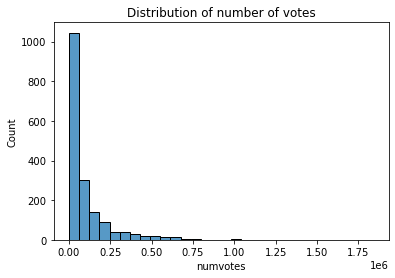

In [27]:
ax=sns.histplot(data=df, x="numvotes", bins=30)
ax.set_title('Distribution of number of votes');

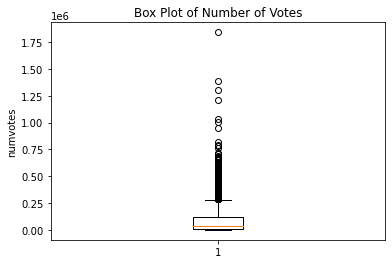

In [28]:
# Select the data to be plotted
data = df['numvotes']

# Plot the box plot
plt.boxplot(data)

# Add a title to the plot
plt.title('Box Plot of Number of Votes')

# Add a label to the y-axis
plt.ylabel('numvotes')

# Show the plot
plt.show()


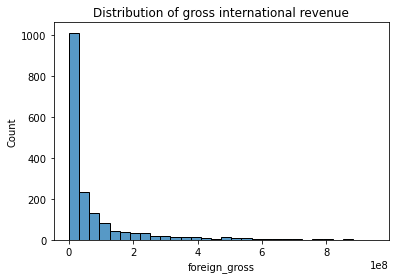

In [29]:
ax=sns.histplot(data=df, x=("foreign_gross"), bins=30)
ax.set_title('Distribution of gross international revenue');

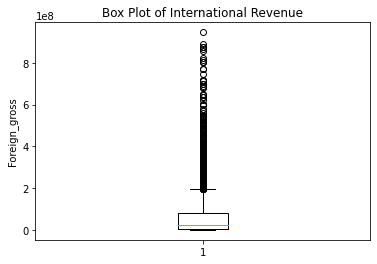

In [30]:
# Select the data to be plotted
data = df['foreign_gross']

# Plot the box plot
plt.boxplot(data)

# Add a title to the plot
plt.title('Box Plot of International Revenue')

# Add a label to the y-axis
plt.ylabel('Foreign_gross')

# Show the plot
plt.show()


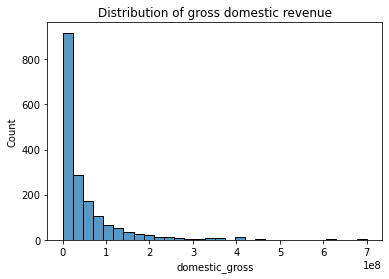

In [31]:
ax=sns.histplot(data=df, x="domestic_gross", bins=30)
ax.set_title('Distribution of gross domestic revenue');

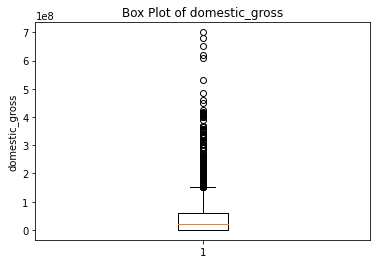

In [32]:
# Select the data to be plotted
data = df['domestic_gross']

# Plot the box plot
plt.boxplot(data)

# Add a title to the plot
plt.title('Box Plot of domestic_gross')

# Add a label to the y-axis
plt.ylabel('domestic_gross')

# Show the plot
plt.show()


The above plots violates the normal distribution, and this explains the difference in their mean and median values.

## Exploratory data Analysis
This includes visualizations on statistics, distributions and relationships within the data.
## Goals
1. conduct EDA on the dataset
2. visualize the data to identify trends



Exploring the type of genre.

In [33]:
# Calculate value counts for each genre in ascending order
df['genre'].value_counts(ascending=False)

Action         458
Drama          360
Comedy         359
Adventure      173
Biography      137
Crime           80
Horror          76
Documentary     65
Animation       22
Thriller        11
Fantasy          9
Mystery          7
Romance          4
Family           3
Music            1
Sci-Fi           1
Name: genre, dtype: int64

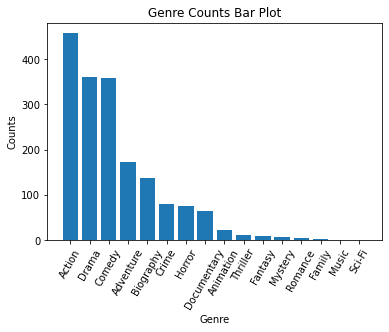

In [34]:
#frequncy of each unique genre
# Calculate value counts for each genre
genre_counts = df['genre'].value_counts(ascending=False)
# Plot the bar plot
plt.bar(genre_counts.index, genre_counts.values)
# Add labels to the x and y axes
plt.xlabel('Genre')
plt.ylabel('Counts')

# Add a title to the plot
plt.title('Genre Counts Bar Plot')
plt.xticks(rotation=60)

# Show the plot
plt.show()

Action, Drama and Comedy movies are the most frequent in the dataset.

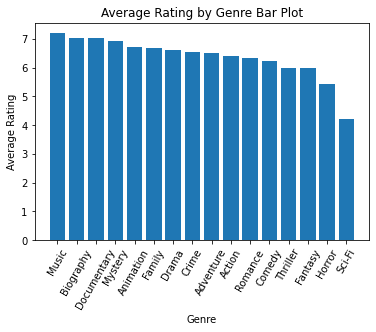

In [35]:
#identifying the most rated genres
# Calculate the average rating for each genre
genre_ratings = df.groupby('genre')['averagerating'].mean()

# Sort the genre ratings in descending order
genre_ratings = genre_ratings.sort_values(ascending=False)

# Plot the bar plot
plt.bar(genre_ratings.index, genre_ratings.values)

# Add labels to the x and y axes
plt.xlabel('Genre')
plt.ylabel('Average Rating')

# Add a title to the plot
plt.title('Average Rating by Genre Bar Plot')
plt.xticks(rotation=60)

# Show the plot
plt.show()


Music, Biography and  Documentary are the most rated genres

## Possible reasons for difference in ratings
Personal preferences: People's individual tastes and preferences play a significant role in how they rate movies. Some people may prefer more introspective or thought-provoking films, while others may prefer fast-paced action movies.

Emotional engagement: Certain genres, such as music and biography, often evoke strong emotional responses in viewers, which can contribute to higher ratings. On the other hand, action movies are often more focused on action and plot than on emotional engagement.

Subjectivity: Ratings are inherently subjective and can be influenced by many different factors, such as the viewer's mood, personal beliefs, and cultural background.

Production quality: The production quality of a movie, including the cinematography, acting, and soundtrack, can also affect how it is rated. High-quality productions in certain genres, such as documentaries and biographies, are often better received by viewers.

Marketing: The marketing strategies used for a movie can also affect its rating. Movies that are marketed as high-quality productions with good reviews may attract more viewers and higher ratings, regardless of genre.

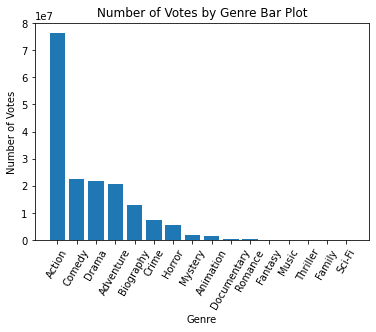

In [36]:
#identifying the most voted genres
# Calculate the number of votes for each genre
genre_votes = df.groupby('genre')['numvotes'].sum()

# Sort the genre votes in descending order
genre_votes = genre_votes.sort_values(ascending=False)

# Plot the bar plot
plt.bar(genre_votes.index, genre_votes.values)

# Add labels to the x and y axes
plt.xlabel('Genre')
plt.ylabel('Number of Votes')

# Add a title to the plot
plt.title('Number of Votes by Genre Bar Plot')

#rotation of the xlabel values
plt.xticks(rotation=60)

# Show the plot
plt.show()

Action, Comedy and drama are the leading most voted genres.

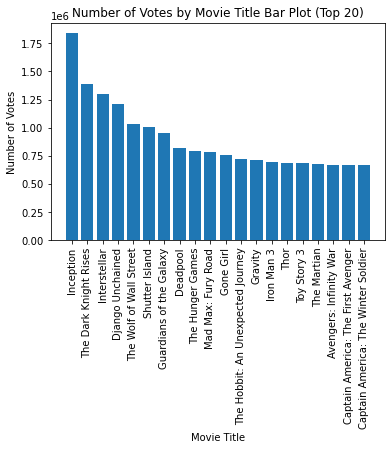

In [37]:
#investigating the most voted movies
# Calculate the number of votes for each movie title
title_votes = df.groupby('primary_title')['numvotes'].sum()

# Sort the title votes in descending order
title_votes = title_votes.sort_values(ascending=False)

# Plot the bar plot for the first 20 titles
plt.bar(title_votes.index[:20], title_votes.values[:20])

# Add labels to the x and y axes
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')

# Add a title to the plot
plt.title('Number of Votes by Movie Title Bar Plot (Top 20)')

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()

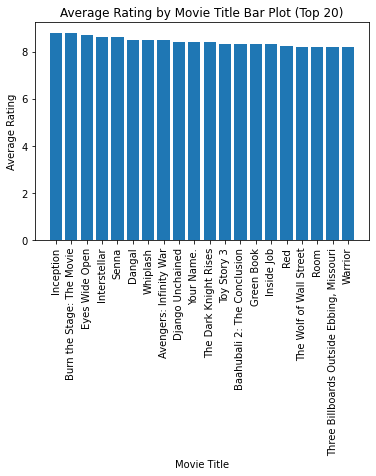

In [38]:
#identify the most rated movie
# Calculate the average rating for each movie title
title_ratings = df.groupby('primary_title')['averagerating'].mean()

# Sort the title ratings in descending order
title_ratings = title_ratings.sort_values(ascending=False)

# Plot the bar plot for the first 20 titles
plt.bar(title_ratings.index[:20], title_ratings.values[:20])

# Add labels to the x and y axes
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')

# Add a title to the plot
plt.title('Average Rating by Movie Title Bar Plot (Top 20)')

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()

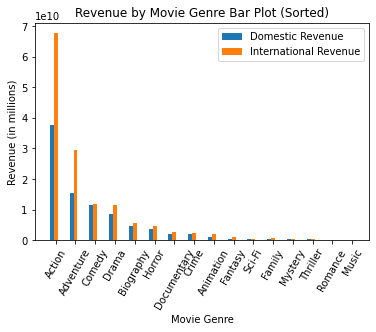

In [39]:
# Calculate the domestic and international revenue for each genre
genre_revenue = df.groupby('genre')[['domestic_gross', 'foreign_gross']].sum()

# Sort the genre revenue in descending order
genre_revenue = genre_revenue.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)

# Set the x-axis as the genre names
x = np.arange(len(genre_revenue.index))

# Plot the bar plot for the domestic and international revenue
plt.bar(x - 0.2, genre_revenue['domestic_gross'], 0.2, label='Domestic Revenue')
plt.bar(x, genre_revenue['foreign_gross'], 0.2, label='International Revenue')

# Add labels to the x and y axes
plt.xlabel('Movie Genre')
plt.ylabel('Revenue (in millions)')

# Add a title to the plot
plt.title('Revenue by Movie Genre Bar Plot (Sorted)')

# Add the genre names as x-axis labels
plt.xticks(x, genre_revenue.index)

# Add a legend to the plot
plt.legend()

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=60)

# Show the plot
plt.show()


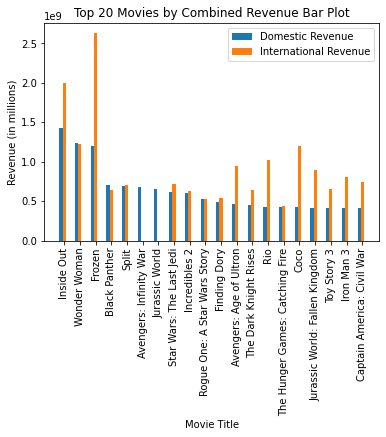

In [40]:

# Calculate the combined domestic and international revenue for each title
title_revenue = df.groupby('primary_title')[['domestic_gross', 'foreign_gross']].sum()

# Sort the title revenue in descending order
title_revenue = title_revenue.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)

# Take the first 20 rows of the title revenue
title_revenue = title_revenue.iloc[:20,:]

# Set the x-axis as the title names
x = np.arange(len(title_revenue.index))

# Plot the bar plot for the domestic and international revenue
plt.bar(x - 0.2, title_revenue['domestic_gross'], 0.2, label='Domestic Revenue')
plt.bar(x, title_revenue['foreign_gross'], 0.2, label='International Revenue')

# Add labels to the x and y axes
plt.xlabel('Movie Title')
plt.ylabel('Revenue (in millions)')

# Add a title to the plot
plt.title('Top 20 Movies by Combined Revenue Bar Plot')

# Add the title names as x-axis labels
plt.xticks(x, title_revenue.index, rotation=90)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


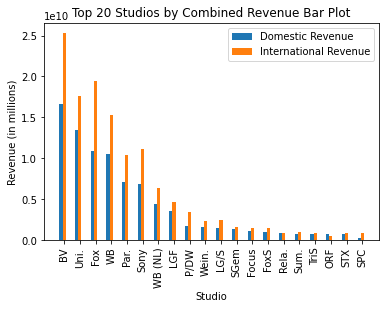

In [41]:
# Calculate the combined domestic and international revenue for each studio
studio_revenue = df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Sort the studio revenue in descending order
studio_revenue = studio_revenue.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)

# Take the first 20 rows of the studio revenue
studio_revenue = studio_revenue.iloc[:20,:]

# Set the x-axis as the studio names
x = np.arange(len(studio_revenue.index))

# Plot the bar plot for the domestic and international revenue
plt.bar(x - 0.2, studio_revenue['domestic_gross'], 0.2, label='Domestic Revenue')
plt.bar(x, studio_revenue['foreign_gross'], 0.2, label='International Revenue')

# Add labels to the x and y axes
plt.xlabel('Studio')
plt.ylabel('Revenue (in millions)')

# Add a title to the plot
plt.title('Top 20 Studios by Combined Revenue Bar Plot')

# Add the studio names as x-axis labels
plt.xticks(x, studio_revenue.index, rotation=90)

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


First 20 studios with the most rated movie. Majority generates more revenue on international level compared to domestically.

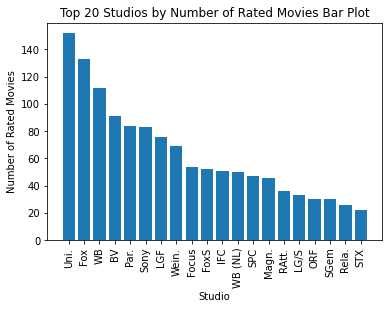

In [42]:
# Calculate the number of rated movies for each studio
studio_ratings = df['studio'].value_counts()

# Sort the studio ratings in descending order
studio_ratings = studio_ratings.sort_values(ascending=False)

# Take the first 20 rows of the studio ratings
studio_ratings = studio_ratings.iloc[:20]

# Set the x-axis as the studio names
x = np.arange(len(studio_ratings.index))

# Plot the bar plot for the number of rated movies
plt.bar(x, studio_ratings.values)

# Add labels to the x and y axes
plt.xlabel('Studio')
plt.ylabel('Number of Rated Movies')

# Add a title to the plot
plt.title('Top 20 Studios by Number of Rated Movies Bar Plot')

# Add the studio names as x-axis labels
plt.xticks(x, studio_ratings.index, rotation=90)

# Show the plot
plt.show()


## Possible reasons for high rating in other studios compared to other
Quality of productions: Studios with a reputation for producing high-quality films are likely to receive higher ratings, as viewers have come to expect a certain level of production value from them.

Consistency: Studios that consistently produce films in a particular genre or style are more likely to be rated highly in that genre or style, as viewers come to associate the studio with that type of film.

Marketing strategies: A studio's marketing strategies can also influence the ratings of their films. Studios that invest heavily in marketing their films are more likely to attract a larger audience and receive higher ratings.

Viewer demographics: Different studios may appeal to different demographic groups, which can influence their ratings. For example, a studio that produces family-friendly films may be more highly rated by families with young children, while a studio that produces more mature or edgy films may be more highly rated by a different demographic.

Brand recognition: Studios with a strong brand reputation are more likely to receive higher ratings, as viewers may have a preconceived notion about the quality of the studio's films based on their past experiences.

Ultimately, the reasons why some studios are more highly rated than others are complex and multifaceted, and can vary based on the individual studio and film.

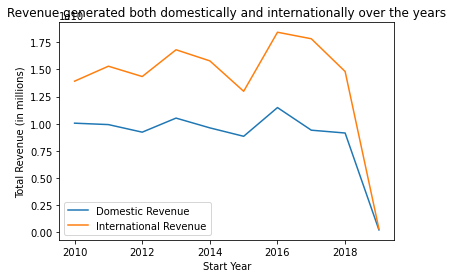

In [43]:
# Group the data by start year
grouped_df = df.groupby('start_year').agg({'domestic_gross': 'sum', 'foreign_gross': 'sum'})

# Plot the line plots for domestic and international revenue by start year
plt.plot(grouped_df.index, grouped_df['domestic_gross'], label='Domestic Revenue')
plt.plot(grouped_df.index, grouped_df['foreign_gross'], label='International Revenue')

# Add labels to the x and y axes
plt.xlabel('Start Year')
plt.ylabel('Total Revenue (in millions)')

# Add a title to the plot
plt.title('Revenue generated both domestically and internationally over the years')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


## Possible causes for the downtrend in revenue collection from 2016 could be;

Competition from other forms of entertainment: The growth of streaming services and other forms of digital entertainment has increased competition for movie theaters.

Economic factors: The overall economic climate can affect the movie industry. For example, during a recession, people may have less disposable income to spend on entertainment, leading to a decrease in movie revenue.

Changes in technology: The advancement of technology has allowed consumers to access movies through various platforms, such as streaming services, DVD rentals, and online downloads. This has led to a decrease in revenue for movie theaters.

Changing audience preferences: The tastes and preferences of moviegoers change over time. If a particular genre or type of movie is no longer in demand, this could lead to a decrease in revenue for the movie industry.

Quality of films: Poorly-received films can negatively impact the overall revenue for the movie industry. If a high number of releases receive negative reviews or have low attendance, it can contribute to a fall in trend of movie revenue collection.

Correlation between the runtimes and number of votes and average rating

In [44]:
#correlation
df['runtime_minutes'].corr(df['numvotes'])

0.33379995293842174

In [45]:
#correlation
df['runtime_minutes'].corr(df['averagerating'])

0.2500941557703461

A correlaton bellow 0.5 indicates weak correlation, which means a movie could run for over 2 hours and still be rated highly, or have a runtime of below 70 minutes and still be rated highly.
From the previous visualizations, remarkable rating could result from  the type of genre and also the studio type.

In conclusion, this project represents a major opportunity for Microsoft to enter the movie production business and tap into the growing demand for original video content. With a comprehensive analysis of the movie industry, Microsoft can make informed decisions about the types of movies to produce, ensuring the success of their new movie studio.